In [19]:
import os
import pandas as pd
from os.path import join, isdir, isfile
import dateutil
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import nilmtk as ntk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CO, FHMMExact, Hart85, Mean
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
from nilmtk_contrib.disaggregate import Seq2Seq, Seq2Point
from nilmtk.utils import print_dict
from nilmtk.api import API
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.debugging.disable_traceback_filtering()
import pickle

In [20]:
def import_model(filename):
    with open(filename, "rb") as pickle_in:
        model = pickle.load(pickle_in)
    return model

In [21]:
model_path = join(os.getcwd(), "trained_models/1sec_99SL.pickle")

In [22]:
model = import_model(model_path)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2024-04-22 16:04:02         4741
metadata.json                                  2024-04-22 16:04:02           64
variables.h5                                   2024-04-22 16:04:02      5409952
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......vars
.........0
.........1
...layers\conv1d_3
......vars
.........0
.........1
...layers\conv1d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......vars
.........0
.........1
...layers\conv1d_3
......vars
.........0
.........1
...layers\conv1d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive loading:
File Nam

File Name                                             Modified             Size
config.json                                    2024-04-22 16:04:04         4743
metadata.json                                  2024-04-22 16:04:04           64
variables.h5                                   2024-04-22 16:04:04     43524904
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......vars
.........0
.........1
...layers\conv1d_3
......vars
.........0
.........1
...layers\conv1d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.....

In [23]:
test_params = {
    'path': 'data/mimos_1_sec.h5',
    'buildings': {
        1: {
            'start_time': '2022-09-27',
            'end_time': '2022-09-28'
        },
        # 2: {
        #     'start_time': '2022-09-29',
        #     'end_time': '2022-09-30'
        # },
        # 3: {
        #     'start_time': '2022-11-01',
        #     'end_time': '2022-11-02'
        # },
        # 4: {
        #     'start_time': '2022-11-07',
        #     'end_time': '2022-11-08'
        # },
#         5: {
#             'start_time': '2022-11-08',
#             'end_time': '2022-11-09'
#         },
        # 6: {
        #     'start_time': '2022-11-09',
        #     'end_time': '2022-11-10'
        # },
        # 7: {
        #     'start_time': '2022-11-10',
        #     'end_time': '2022-11-11'
        # }
    }
}

Loading data for  test  dataset
Dropping missing values
Generating predictions for : Seq2Seq
9/9 [==============================] - 0s 14ms/step
Generating predictions for : Seq2Point
9/9 [==============================] - 0s 48ms/step
............  mae  ..............
                                     Seq2Seq  Seq2SPoint
fridge                             16.994713   18.595011
air conditioner                    62.027287   58.807396
washing machine                    15.001245   14.272959
tumble dryer                       37.021114   83.261375
kettle                             51.363613   75.251511
vacuum cleaner                     78.311836   98.210945
electric water heating appliance   42.945702   48.112617
oven                              100.544693   78.024422
............  rmse  ..............
                                     Seq2Seq  Seq2SPoint
fridge                             17.985620   19.181501
air conditioner                    79.669928  107.278105
washing mac

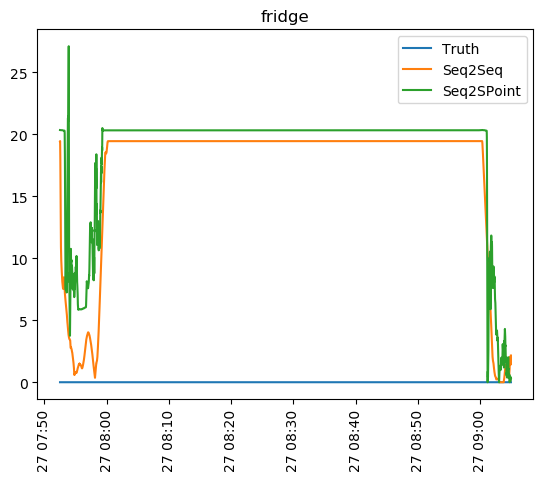

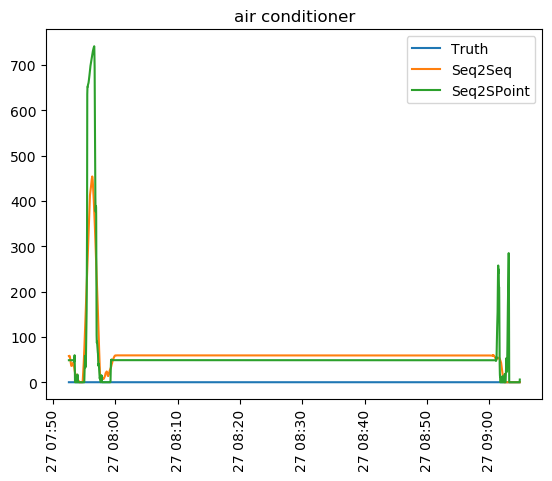

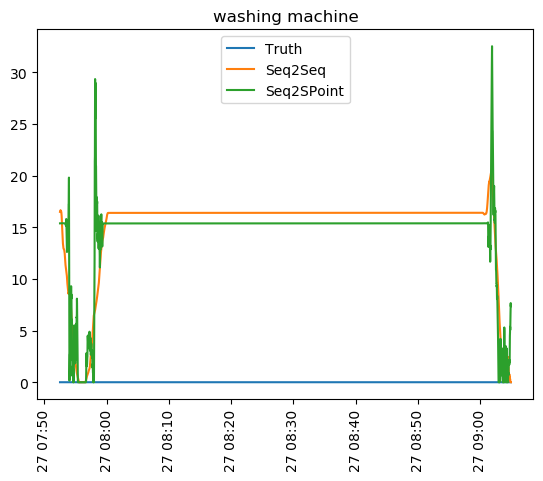

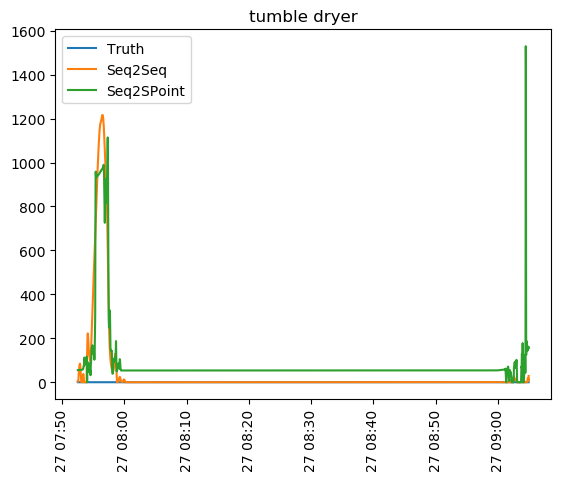

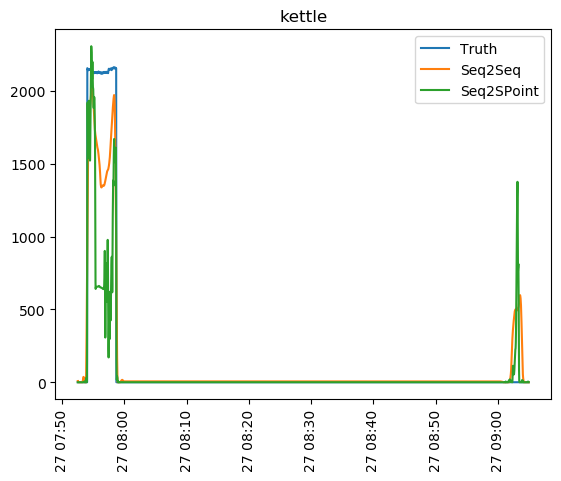

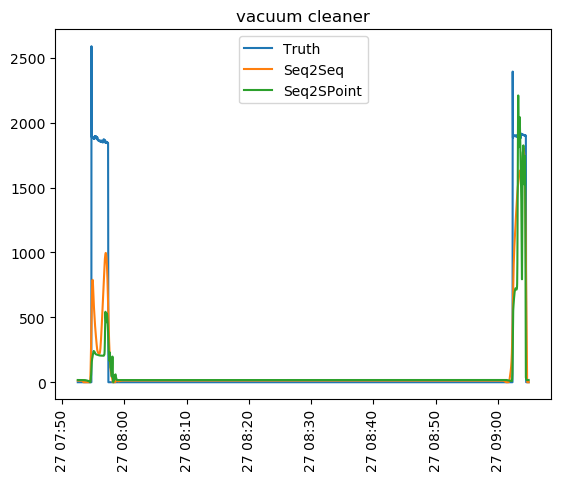

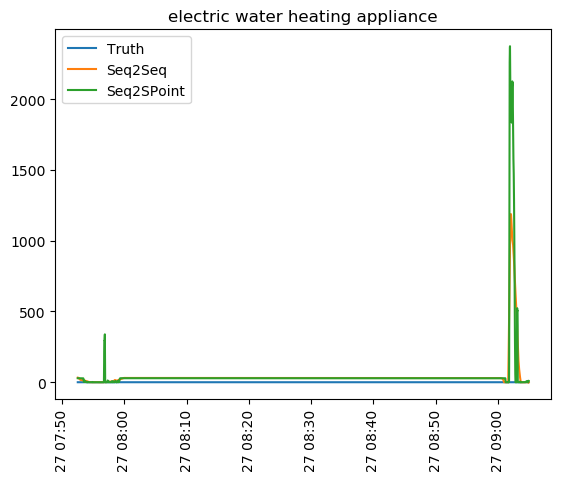

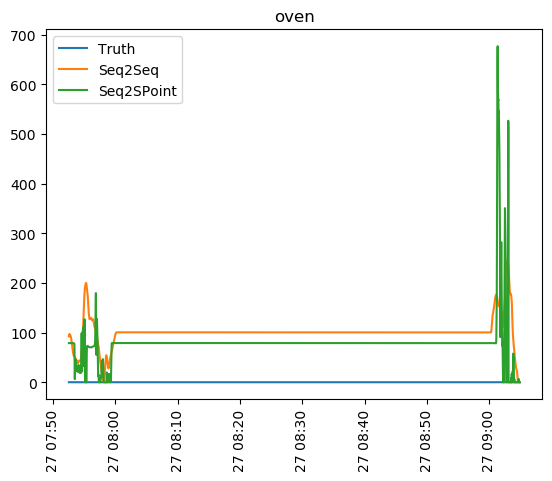

In [24]:
test = model.test_jointly({'test': test_params})

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

threshold_lst = []
appliances = ['fridge',
 'air conditioner',
 'washing machine',
 'tumble dryer',
 'kettle',
 'vacuum cleaner',
 'electric water heating appliance',
 'oven']

for i in range(len(appliances)):
    # Extract the values
    X = model.pred_overall['Seq2Seq'][appliances[i]].values.reshape(-1, 1)

    # Apply k-means clustering with k=2
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)

    # Get the centroids
    centroids = kmeans.cluster_centers_

    # Calculate the threshold value
    threshold = (centroids[0][0] + centroids[1][0]) / 2
    threshold_lst.append(threshold)

In [29]:
threshold_lst

[11.141407012939453,
 204.77542114257812,
 9.824880599975586,
 483.34197998046875,
 818.9142456054688,
 618.3685913085938,
 445.1866455078125,
 137.2661895751953]

In [36]:
def window_measure(size):
    
    if size == 1:
        size = 2
    
    for i in range(len(model.appliances)):
        windows_actual = []
        windows_classified = []
        windows_accuracy = []

        for j in range(0, len(model.gt_overall), size - 1):   # window - 1
            if j + (size - 1) <= len(model.gt_overall):
                windows_actual.append(model.gt_overall[model.appliances[i]].iloc[j:j + size].tolist())
                windows_classified.append(model.pred_overall['Seq2Seq'][model.appliances[i]].iloc[j:j + size].tolist())  # window + 1
            else:
                windows_actual.append(model.gt_overall[model.appliances[i]].iloc[j:].tolist())
                windows_classified.append(model.pred_overall['Seq2Seq'][model.appliances[i]].iloc[j:].tolist())

        for k in range(len(windows_actual)):
            
            TP = 0 ; TN = 0 ; FP = 0 ; FN = 0
            
            for p in range(len(windows_actual[k])):
                if (windows_actual[k][p] > threshold_lst[i]) & (windows_classified[k][p] > threshold_lst[i]):
                    TP += 1
                if (windows_actual[k][p] <= threshold_lst[i]) & (windows_classified[k][p] <= threshold_lst[i]):
                    TN += 1
                if (windows_actual[k][p] <= threshold_lst[i]) & (windows_classified[k][p] > threshold_lst[i]):
                    FP += 1
                if (windows_actual[k][p] > threshold_lst[i]) & (windows_classified[k][p] <= threshold_lst[i]):
                    FN += 1
            accuracy = (TP + TN) / (TP + FP + FN + TN)
            windows_accuracy.append(accuracy)
            
        print("{} - Accuracy: {:.2%}".format(model.appliances[i].capitalize(), (sum(windows_accuracy) / len(windows_accuracy))))

In [37]:
test = [1, 60, 99, 300, 500, 600, 1000, 3000]
for i in test:
    window_measure(i)
    print("===================================")

Fridge - Accuracy: 14.35%
Air conditioner - Accuracy: 97.65%
Washing machine - Accuracy: 9.98%
Tumble dryer - Accuracy: 96.80%
Kettle - Accuracy: 99.98%
Vacuum cleaner - Accuracy: 97.77%
Electric water heating appliance - Accuracy: 98.25%
Oven - Accuracy: 95.01%
Fridge - Accuracy: 14.75%
Air conditioner - Accuracy: 97.66%
Washing machine - Accuracy: 10.41%
Tumble dryer - Accuracy: 96.82%
Kettle - Accuracy: 99.98%
Vacuum cleaner - Accuracy: 97.74%
Electric water heating appliance - Accuracy: 98.27%
Oven - Accuracy: 95.05%
Fridge - Accuracy: 15.62%
Air conditioner - Accuracy: 97.69%
Washing machine - Accuracy: 11.29%
Tumble dryer - Accuracy: 96.86%
Kettle - Accuracy: 99.98%
Vacuum cleaner - Accuracy: 97.71%
Electric water heating appliance - Accuracy: 98.27%
Oven - Accuracy: 95.08%
Fridge - Accuracy: 17.02%
Air conditioner - Accuracy: 97.73%
Washing machine - Accuracy: 12.15%
Tumble dryer - Accuracy: 96.91%
Kettle - Accuracy: 99.98%
Vacuum cleaner - Accuracy: 97.75%
Electric water heatin